In [1]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
ROBOFLOW_WORKSPACE = "unsignedarduino-9db8i" # @param {"type":"string"}
ROBOFLOW_PROJECT = "chessbot-boards" # @param {"type":"string"}

from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key=userdata.get("ROBOFLOW_API_KEY"))
project = rf.workspace(ROBOFLOW_WORKSPACE).project(ROBOFLOW_PROJECT)
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chessbot-Boards-1 in yolov11:: 100%|██████████| 390/390 [00:00<00:00, 7691.16it/s]


In [3]:
!yolo task=detect mode=train model=yolo11s-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 19.7M/19.7M [00:00<00:00, 54.8MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=/content/Chessbot-Boards-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=T

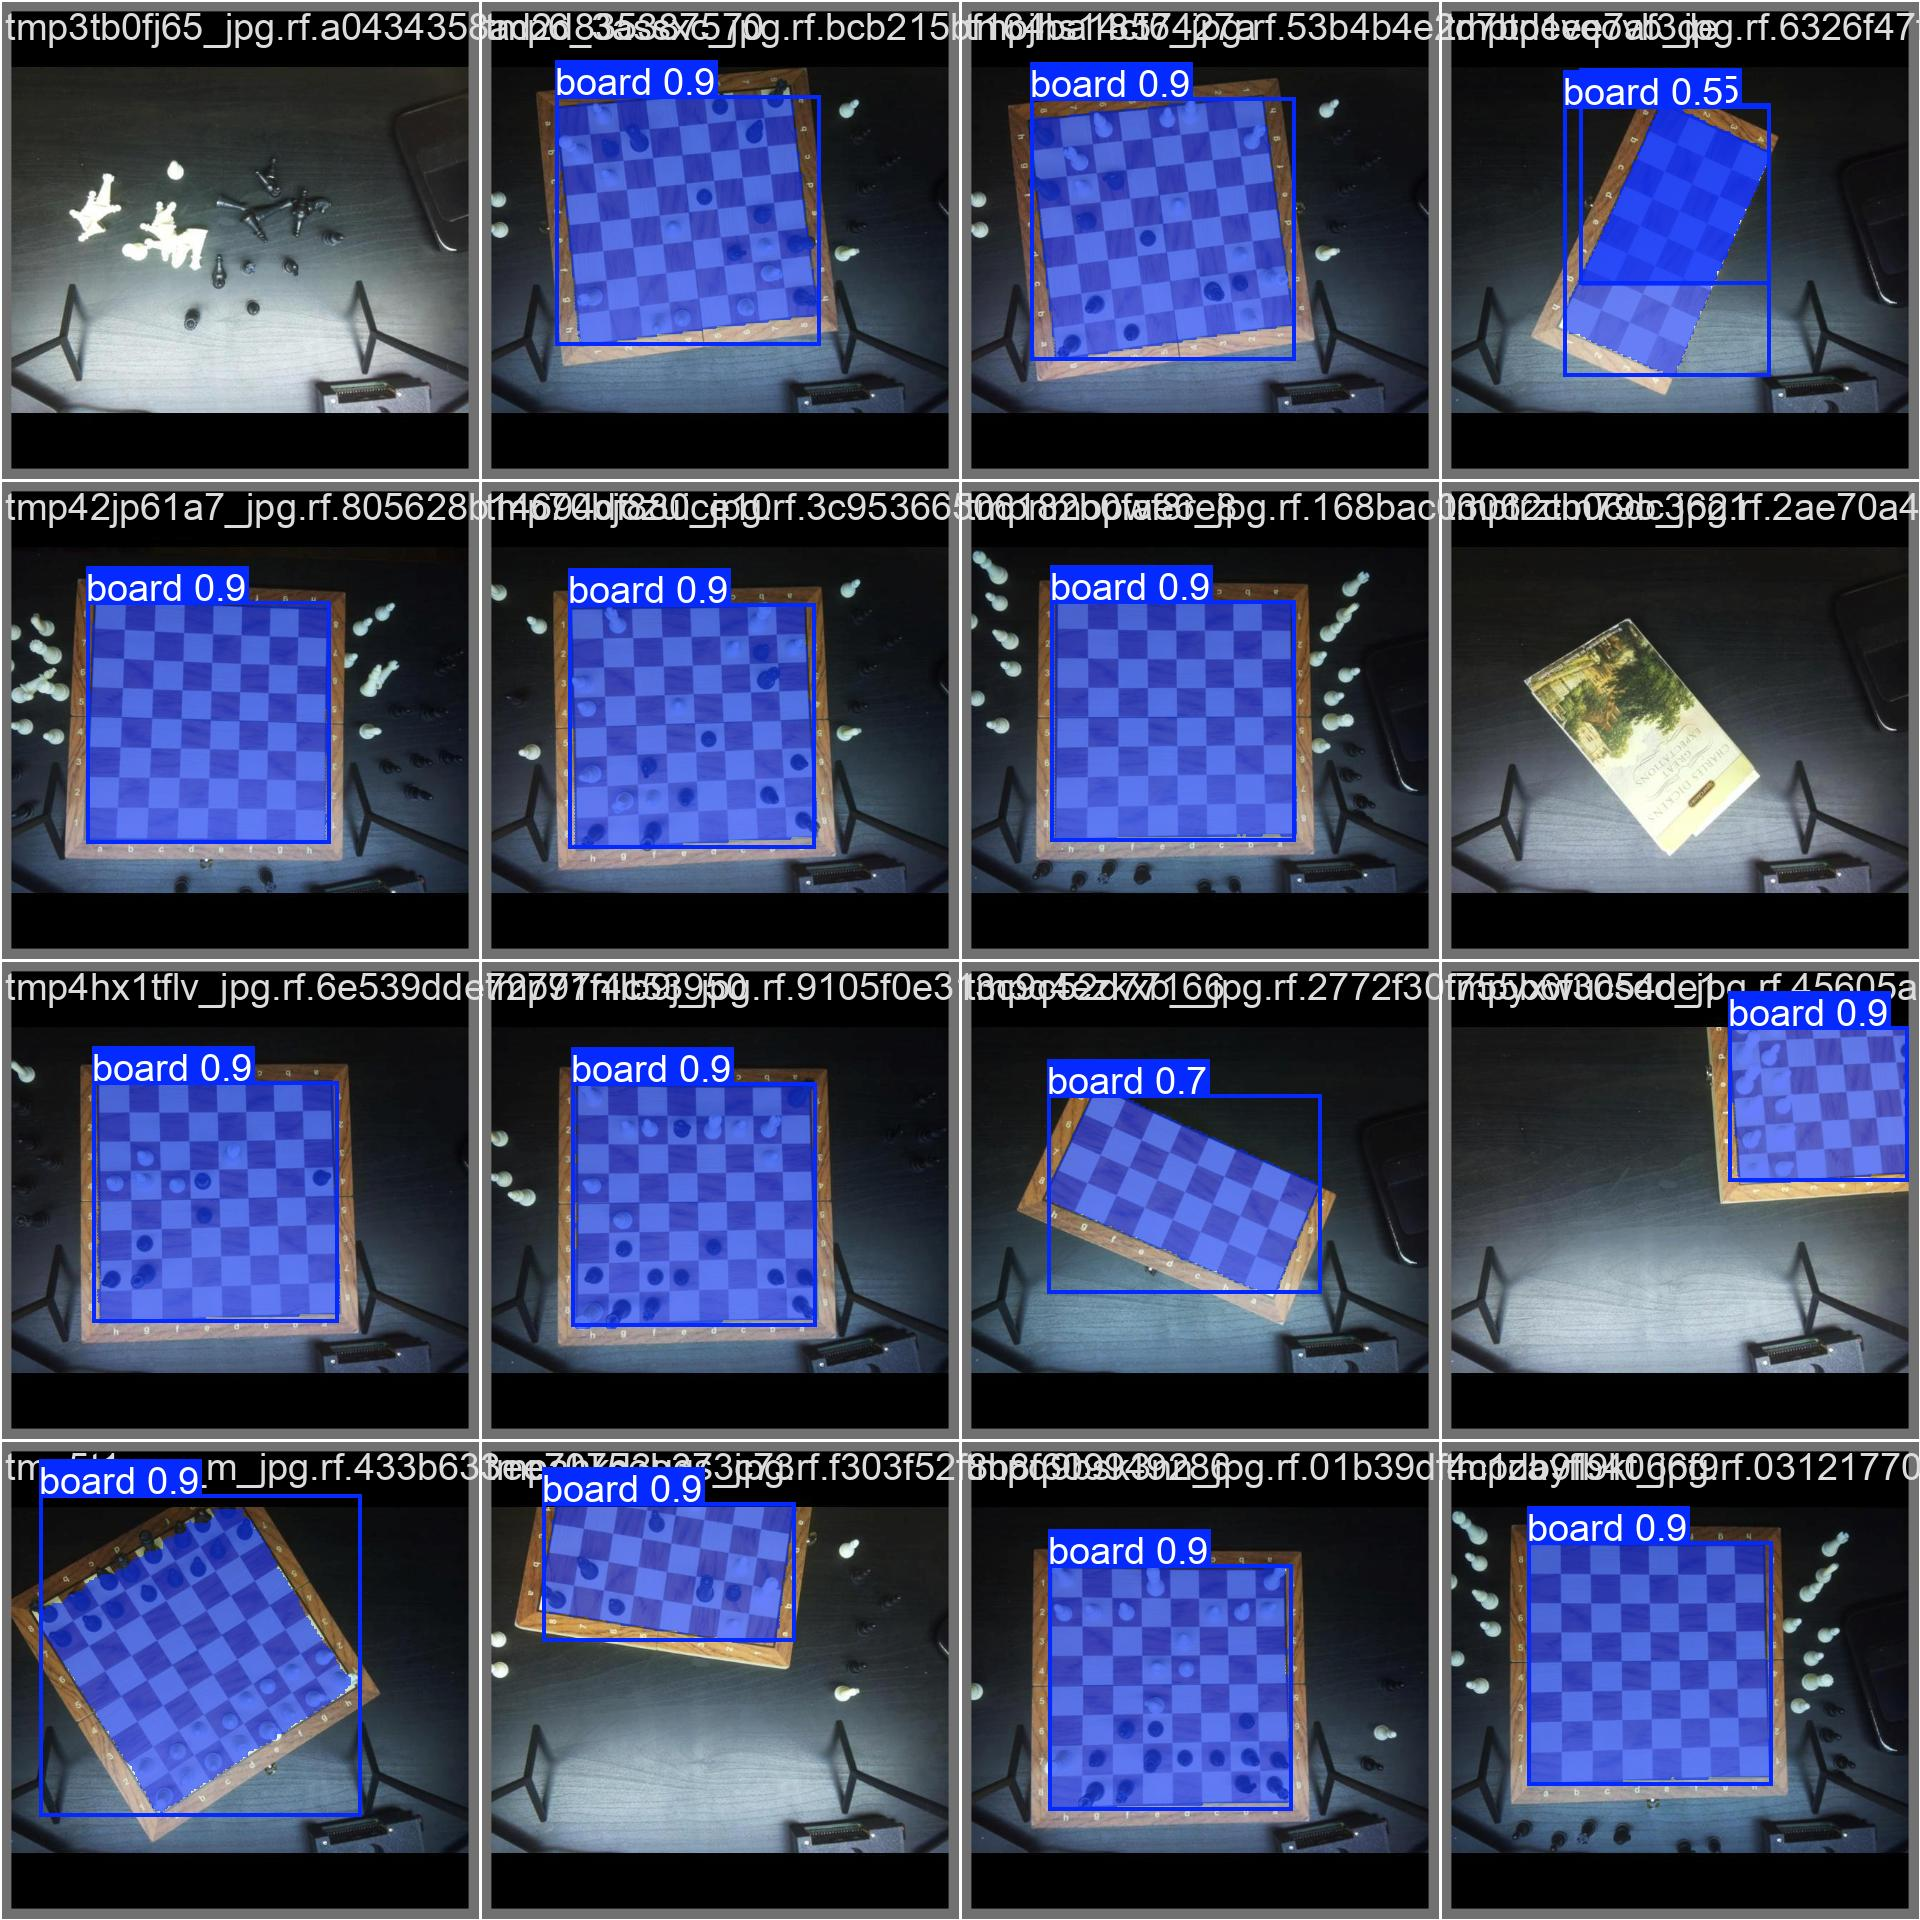

In [6]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'runs/segment/train/confusion_matrix.png', width=600)
IPyImage(filename=f'runs/segment/train/results.png', width=600)
IPyImage(filename=f'runs/segment/train/val_batch0_pred.jpg', width=600)

In [8]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"runs/segment/train/")

View the status of your deployment at: https://app.roboflow.com/unsignedarduino-9db8i/chessbot-boards/1
Share your model with the world at: https://universe.roboflow.com/unsignedarduino-9db8i/chessbot-boards/model/1
